In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

C:\Users\jesic\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_final_merged_cleaned= pd.read_csv('D:\Data Sampel Final 2022-20230608T163803Z-001\Data Sampel Final 2022\Kontekstual TB\df_final_merged_cleaned.csv')

In [15]:
# Memilih fitur numerik yang relevan untuk clustering
features = ['Usia','PSTV05', 'PSTV09','Frekuensi_Kunjungan_FKRTL', 'Frekuensi_Kunjungan_FKTP', ]

# Memilih subset data yang relevan
X = df_final_merged_cleaned[features]

# Menormalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

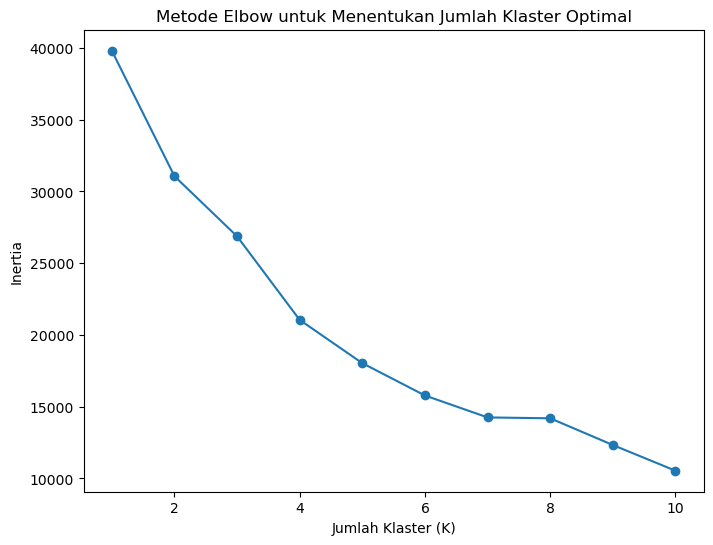

,Usia,PSTV05,PNK09,Frekuensi_Kunjungan_FKRTL,Frekuensi_Kunjungan_FKTP,Cluster
0,35,1,5,7.0,1.0,0
1,65,0,5,4.0,1.0,1
2,61,0,2,90.0,1.0,1
3,61,0,3,11.0,28.0,1
4,76,0,5,5.0,1.0,1


In [16]:
# Menentukan jumlah klaster optimal menggunakan metode Elbow
inertia = []
k_range = range(1, 11)  # Mengevaluasi jumlah klaster dari 1 sampai 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Melatih model K-Means
    inertia.append(kmeans.inertia_)  # Menyimpan inertia untuk setiap k

# Membuat grafik Elbow untuk menentukan jumlah klaster optimal
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Inertia')
plt.show()

# Berdasarkan grafik Elbow, tentukan jumlah klaster yang optimal, misalnya K = 3
optimal_k = 3

# Membangun model K-Means dengan jumlah klaster yang optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_final_merged_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)  # Menambahkan label klaster ke DataFrame

# Menampilkan hasil klasterisasi
df_final_merged_cleaned[['Usia', 'PSTV05', 'PNK09', 'Frekuensi_Kunjungan_FKRTL', 'Frekuensi_Kunjungan_FKTP', 'Cluster']].head()


In [17]:
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

# Menampilkan hasil SC
print(f"Silhouette Coefficient: {silhouette_avg:.4f}")

# Jika SC > 0.55, berarti klasterisasi memenuhi syarat evaluasi
if silhouette_avg > 0.55:
    print("Clustering model memenuhi syarat evaluasi dengan SC > 55%")
else:
    print("Clustering model tidak memenuhi syarat evaluasi")

Silhouette Coefficient: 0.2745
Clustering model tidak memenuhi syarat evaluasi


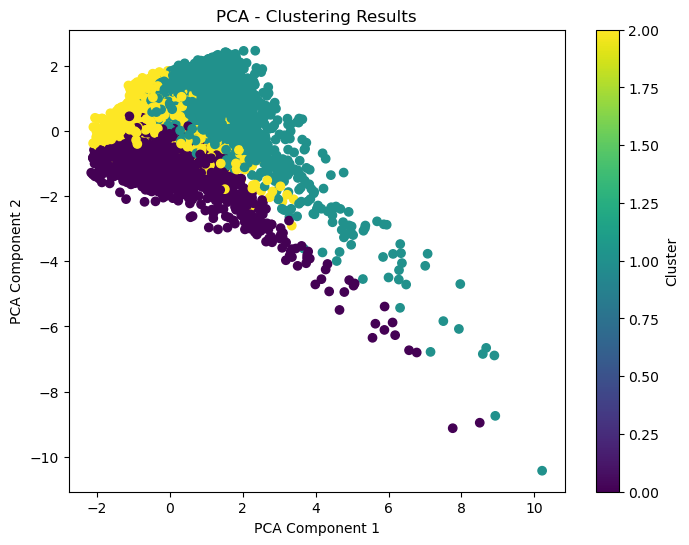

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi menggunakan PCA ke 2 komponen utama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Menambahkan hasil PCA dan klaster ke DataFrame
df_final_merged_cleaned['PCA1'] = X_pca[:, 0]
df_final_merged_cleaned['PCA2'] = X_pca[:, 1]

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df_final_merged_cleaned['PCA1'], df_final_merged_cleaned['PCA2'], c=df_final_merged_cleaned['Cluster'], cmap='viridis')
plt.title('PCA - Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [19]:
df_final_merged_cleaned

,PSTV01,PSTV03,PSTV05,PSTV09,PSTV10,PSTV12,PSTV13,PSTV15,PSTV16,Usia,...,PNK06,PNK07,PNK09,PNK10,PNK12,Bulan_Kunjungan_FKTP,Tahun_Kunjungan_FKTP,Cluster,PCA1,PCA2
0,328537885,1989-07-13,1,0,6,2,0,9.436164,2019,35,...,0,6,5,RAWAT INAP,PBI APBD,5,2020,0,-1.118923,-1.046885
1,75453396,1959-08-25,0,9,59,2,9,10.173553,2019,65,...,9,54,5,RAWAT INAP,BUKAN PEKERJA,8,2019,1,0.808554,0.920464
2,98396595,1963-11-17,0,10,286,1,10,1.258935,2019,61,...,10,265,2,KLINIK RAWAT INAP,PPU,7,2019,1,1.865802,-0.239950
3,96362720,1963-06-05,0,10,470,2,10,7.791785,2019,61,...,10,24,3,LABORATORIUM,PPU,10,2018,1,2.008372,-0.372773
4,13050306,1949-05-25,0,27,154,2,27,6.025955,2019,76,...,27,136,5,RAWAT INAP,BUKAN PEKERJA,6,2019,1,1.228641,2.017802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,36617345,1962-05-10,0,31,453,2,31,3.182838,2019,63,...,31,406,5,RAWAT INAP,PBPU,2,2019,1,1.211605,1.671833
7957,406096111,1958-07-01,0,22,275,2,22,1.144417,2019,66,...,22,381,5,RAWAT INAP,PBI APBN,12,2019,1,0.830321,1.674946
7958,304128687,1992-08-09,1,10,428,2,10,4.157338,2019,32,...,10,383,5,RAWAT INAP,PBI APBN,1,2021,0,-1.140039,-0.599825
7959,382358291,1961-12-10,0,32,374,1,32,2.609354,2019,63,...,32,336,2,KLINIK RAWAT INAP,PBI APBN,10,2019,1,1.038660,1.897720
